# Tugas Analisis Multimedia: Audio, Gambar, Video

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Muhammad Yusuf    
**NIM:** 122140193  

## Import Library Section

In [4]:
# Import Library (Satu-satunya sel kode dalam template ini)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import librosa
import soundfile as sf
from PIL import Image
import cv2
from IPython.display import Audio, HTML, display
import os

# Set matplotlib untuk menampilkan plot inline
%matplotlib inline

# Tampilkan versi library untuk dokumentasi
print("Library versions:")
print(f"NumPy: {np.__version__}")
# saya ubah menjadi matplotlib.__version__ karena matplotlib.pyplot tidak memiliki atribut __version__ di beberapa versi
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Librosa: {librosa.__version__}")
print(f"OpenCV: {cv2.__version__}")

Library versions:
NumPy: 2.2.6
Matplotlib: 3.10.6
Librosa: 0.11.0
OpenCV: 4.12.0


# Pendahuluan

## Apa itu Data Multimedia?

Data multimedia adalah informasi yang dikodekan dalam berbagai format untuk merepresentasikan dunia nyata:

- **Audio (1D)**: Sinyal satu dimensi yang berubah terhadap waktu
  - Contoh: musik, suara, speech
  - Representasi: amplitudo vs waktu
  
- **Gambar (2D)**: Matriks nilai intensitas dalam ruang dua dimensi
  - Contoh: foto, ilustrasi, grafik
  - Representasi: intensitas pixel pada koordinat (x,y)
  
- **Video (2D + Waktu)**: Rangkaian frame (gambar) yang ditampilkan berurutan
  - Contoh: film, rekaman, animasi
  - Representasi: frame berubah terhadap waktu dengan frame rate tertentu

## Tujuan Tugas

Memahami representasi dasar dan teknik visualisasi fundamental untuk setiap jenis media multimedia, termasuk:
- Cara memuat dan membaca file multimedia
- Ekstraksi informasi metadata yang penting
- Visualisasi yang informatif dan mudah dipahami
- Interpretasi hasil analisis secara kontekstual

## Cara Kerja

1. Isi setiap bagian sesuai instruksi yang diberikan
2. Tambahkan sel kode di tempat yang ditandai dengan "TODO"
3. Berikan interpretasi dan analisis setelah setiap visualisasi
4. Pastikan semua plot memiliki judul, label, dan keterangan yang jelas

## Answer Section

# Bagian A — Audio

### A1. Deskripsi Data

**TODO:** Jelaskan audio yang akan Anda analisis:
- Jenis audio: musik
- Sumber: youtube download to wav menggunakan [tuberipper](https://tuberipper.cc/62/save/wav)
- Format file: WAV
- Alasan pemilihan: Musik kesukaan, booster kegiatan (tugas, chill, gym, kerja)

**Path file:** `data/audio_parano.wav`

---

### A2. TODO: Muat & Metadata

**Instruksi:**
Tulis kode untuk memuat file audio dan menampilkan metadata dasar:
- Sample rate (Hz)
- Durasi (detik)
- Jumlah kanal (mono/stereo)
- Jumlah total sampel

**Catatan:** Jika file MP3 bermasalah saat loading, gunakan format WAV sebagai alternatif.

In [5]:
# Path file audio
audio_path = os.path.join(os.getcwd(), "data", "audio_parano.wav")

# Muat audio dengan librosa (default mono, sr=22050), kita set sr=None agar tetap pakai sample rate asli
y, sr = librosa.load(audio_path, sr=None, mono=False)

# Metadata dengan soundfile
with sf.SoundFile(audio_path) as f:
    sample_rate = f.samplerate
    n_samples = len(f)
    duration = len(f) / f.samplerate
    channels = f.channels

print("=== Metadata Audio ===")
print(f"Sample rate : {sample_rate} Hz")
print(f"Durasi      : {duration:.2f} detik")
print(f"Jumlah kanal: {channels} ({'Mono' if channels==1 else 'Stereo'})")
print(f"Total sampel: {n_samples}")

=== Metadata Audio ===
Sample rate : 48000 Hz
Durasi      : 116.80 detik
Jumlah kanal: 2 (Stereo)
Total sampel: 5606480


---

### A3. TODO: Waveform

**Instruksi:**
Plot waveform audio dengan:
- Sumbu X: waktu (detik)
- Sumbu Y: amplitudo
- Judul dan label sumbu yang jelas

**Analisis yang diperlukan:**
Jelaskan apa yang Anda lihat dari waveform (pola amplitudo, bagian keras/pelan, dll.)

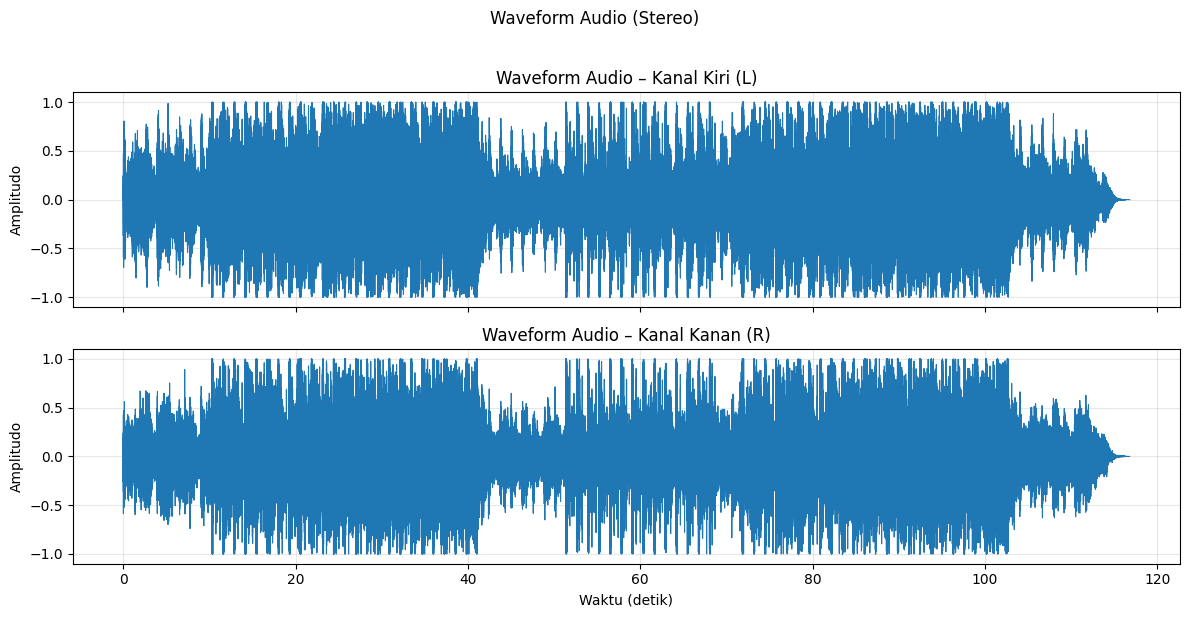

In [ ]:
# Load aman (pakai sample rate asli)
try:
    y  # cek apakah sudah ada dari A2
    sr
except NameError:
    y, sr = librosa.load(audio_path, sr=None, mono=False)  # Load audio dengan sample rate asli

# Normalisasi bentuk y untuk konsistensi (mono atau stereo)
if y.ndim == 1:
    y_plot = y[np.newaxis, :]  # (1, n) untuk mono
else:
    y_plot = y  # (2, n) untuk stereo

# Mendapatkan jumlah kanal dan sampel
n_channels, n_samples = (1, y_plot.shape[-1]) if y_plot.ndim == 2 and y_plot.shape[0] == 1 else (y_plot.shape[0], y_plot.shape[-1])

# Membuat sumbu waktu (detik)
t = np.arange(n_samples) / sr

# Optional: downsample tampilan untuk file sangat panjang agar plotting cepat
target_points = 200_000  # Target jumlah titik tampilan
step = max(1, n_samples // target_points)  # Menentukan langkah downsample

# Plot waveform
if n_channels == 1:
    # Plot untuk audio mono
    plt.figure(figsize=(12, 4))
    plt.plot(t[::step], y_plot[0, ::step], linewidth=0.8)
    plt.title("Waveform Audio (Mono)")  # Judul untuk mono
    plt.xlabel("Waktu (detik)")  # Label sumbu X
    plt.ylabel("Amplitudo")  # Label sumbu Y
    plt.grid(True, alpha=0.3)  # Grid dengan transparansi
    plt.tight_layout()
    plt.show()
else:
    # Plot untuk audio stereo
    fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)  # Membuat 2 subplot
    ch_names = ["Kanal Kiri (L)", "Kanal Kanan (R)"]  # Nama kanal
    for i, ax in enumerate(axes):
        ax.plot(t[::step], y_plot[i, ::step], linewidth=0.8)  # Plot tiap kanal
        ax.set_ylabel("Amplitudo")  # Label sumbu Y tiap kanal
        ax.set_title(f"Waveform Audio – {ch_names[i]}")  # Judul tiap kanal
        ax.grid(True, alpha=0.3)  # Grid dengan transparansi
    axes[-1].set_xlabel("Waktu (detik)")  # Label sumbu X
    fig.suptitle("Waveform Audio (Stereo)", y=1.02, fontsize=12)  # Judul umum untuk stereo
    plt.tight_layout()
    plt.show()


### Analisis pribadi

Dari gambar waveform yang muncul terlihat berbeda tipis antara kanal kanan dan kiri, tapi jika dilihat secara sekilas keduanya hampir memiliki pola yang mirip, tapi menurut saya kanal kiri memiliki amplitudo yang rentangnya lebih lebar daripada kanal kanan

---

### A4. TODO: Spectrogram log-dB

**Instruksi:**
Hitung STFT dan tampilkan spectrogram dalam skala log-dB:
- Gunakan parameter standar (n_fft=1024, hop_length=256)
- Tampilkan dengan colorbar
- Label sumbu: waktu (detik) dan frekuensi (Hz)

**Analisis yang diperlukan:**
Jelaskan perbedaan informasi yang didapat dari spectrogram dibanding waveform.

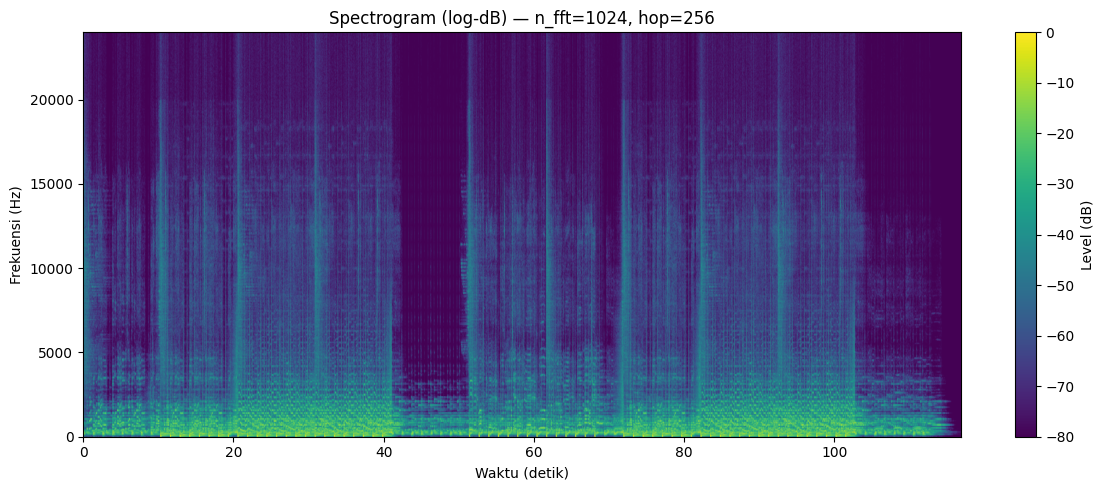

In [7]:
# pilih kanal/mono lalu hitung STFT (n_fft=1024, hop_length=256) dan ubah ke skala log-dB
n_fft = 1024
hop_length = 256
y_mono = y if y.ndim == 1 else y.mean(axis=0)
D = librosa.stft(y_mono, n_fft=n_fft, hop_length=hop_length, window='hann', center=True)
S = np.abs(D)
S_db = librosa.amplitude_to_db(S, ref=np.max)

# siapkan sumbu waktu (detik) dan frekuensi (Hz)
t = librosa.frames_to_time(np.arange(S_db.shape[1]), sr=sr, hop_length=hop_length)
f = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

# plot spectrogram log-dB dengan colorbar dan label sumbu
plt.figure(figsize=(12, 5))
plt.imshow(S_db, origin='lower', aspect='auto',
           extent=[t[0], t[-1], f[0], f[-1]])
cbar = plt.colorbar()
cbar.set_label("Level (dB)")
plt.title("Spectrogram (log-dB) — n_fft=1024, hop=256")
plt.xlabel("Waktu (detik)")
plt.ylabel("Frekuensi (Hz)")
plt.tight_layout()
plt.show()


### Analisis pribadi

Dari gambar spectogram bisa dilihat bahwa semakin besar frekuensi maka audio yang dibuat itu suaranya seperti nyaring, dan ditengah itu di detik sekitar 40-50 an, level dB nya itu kecil karena di detik 40-50 an isinya hanya suara music pelan tanpa ada nyanyian

---

### A5. TODO: MFCC

**Instruksi:**
Hitung dan tampilkan minimal 13 koefisien MFCC sebagai heatmap:
- Sumbu X: waktu (frame)
- Sumbu Y: koefisien MFCC (1-13)
- Gunakan colorbar dan judul yang jelas

**Analisis yang diperlukan:**
Interpretasi sederhana: apakah pola MFCC stabil atau berubah-ubah? Apa potensi maknanya?

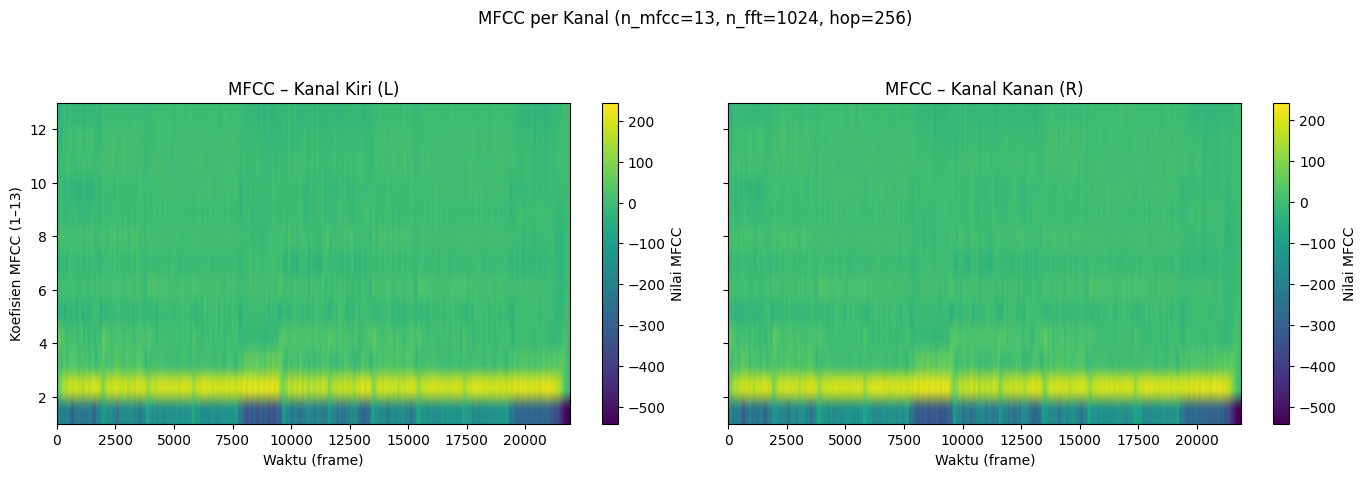

In [8]:
# siapkan parameter konsisten dengan A4
n_mfcc = 13
n_fft = 1024
hop_length = 256

# normalisasi bentuk data jadi (n_channels, n_samples)
if y.ndim == 1:
    chans = [y]
else:
    y2 = y if y.shape[0] <= 2 else y.T
    chans = [y2[0]]
    if y2.shape[0] >= 2:
        chans.append(y2[1])

# hitung MFCC per kanal
mfcc_list = [librosa.feature.mfcc(y=c, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
             for c in chans]

# siapkan sumbu frame dan indeks koefisien
frames = np.arange(mfcc_list[0].shape[1])
coeff_idx = np.arange(1, n_mfcc + 1)

# plot heatmap MFCC per kanal (L/R) atau tunggal jika mono
if len(mfcc_list) == 1:
    plt.figure(figsize=(12, 4.5))
    plt.imshow(mfcc_list[0], origin='lower', aspect='auto',
               extent=[frames[0], frames[-1], coeff_idx[0], coeff_idx[-1]])
    cbar = plt.colorbar(); cbar.set_label("Nilai MFCC")
    plt.title(f"MFCC – Mono (n_mfcc={n_mfcc}, n_fft={n_fft}, hop={hop_length})")
    plt.xlabel("Waktu (frame)"); plt.ylabel("Koefisien MFCC (1–13)")
    plt.tight_layout(); plt.show()
else:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4.5), sharey=True)
    titles = ["Kanal Kiri (L)", "Kanal Kanan (R)"]
    for i, ax in enumerate(axes):
        im = ax.imshow(mfcc_list[i], origin='lower', aspect='auto',
                       extent=[frames[0], frames[-1], coeff_idx[0], coeff_idx[-1]])
        cbar = plt.colorbar(im, ax=ax); cbar.set_label("Nilai MFCC")
        ax.set_title(f"MFCC – {titles[i]}"); ax.set_xlabel("Waktu (frame)")
    axes[0].set_ylabel("Koefisien MFCC (1–13)")
    plt.suptitle(f"MFCC per Kanal (n_mfcc={n_mfcc}, n_fft={n_fft}, hop={hop_length})", y=1.05)
    plt.tight_layout(); plt.show()

### Analisis

AI,     
Pola MFCC terlihat relatif stabil di kedua kanal, dengan koefisien rendah mendominasi sepanjang lagu. Potensi maknanya: musik punya timbre yang konsisten dan tidak banyak perubahan drastis antar bagian. Kesamaan pola L dan R menunjukkan mix stereo yang seimbang, tanpa panning ekstrem.

Saya, setelah belajar dari AI,  
Kedua kanal sepenglihatan saya memiliki pola stabil, dengan koefisien MFCC yang rendah di sepanjang lagu yakni stabil di 1-3, untuk yang warna hijau dari 4-13 itu nilai MFCC nya tinggi berada di rentang 0-100 menandakan perubahan tekstur harmonik merupakan orang bernyanyi, yang warna kuning dengan nilai MFCC yang besar kemungkinan ada tambahan instrumen seperti ketukan beat music memiliki pola 'dung..dung..dung' dengan tempo yang konsisten di sepanjang music.

---

### A6. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

1. **Perbedaan insight:** Apa perbedaan informasi yang didapat dari waveform versus spectrogram?

   *Jawaban Anda:*   
   spectogram lebih mudah di analisis untuk mengetahui isi audionya dan seperti apa suaranya, kalau waveform menurut saya itu untuk mengetahui kapan audio masuk ke tinggi/rendah/diam saja, dan waveform itu mirip dengan yang visual audio di aplikasi editor video(capcut, adobe premier, dll).

2. **Pembelajaran dari MFCC:** Apa yang Anda pelajari dari visualisasi MFCC audio ini?

   *Jawaban Anda:*
   
   1. Kalau MFCC stabil → musik ini konsisten dari sisi warna suara; cocok untuk penggunaan yang butuh kestabilan timbre (misalnya background musik).   
   2. Kalau MFCC berubah-ubah (yang tidak terlalu terlihat di sini) → itu biasanya pertanda variasi instrumen, vokal, atau transisi antar bagian lagu.

# Bagian B — Gambar

### B1. Deskripsi Data

**TODO:** Jelaskan gambar yang akan Anda analisis:
- Jenis gambar: ilustrasi documenter video
- Sumber: editan sendiri + asset dari kkn saya di Suoh, Lampung Barat
- Format file: PNG
- Alasan pemilihan: saya memilih ini karena gambar ini merupakan project yang sangat memorable bagi saya, dan warna yang ada dominan ke warna hijau, ada biru juga, namun merahnya sedikit

**Path file:** `data/suwai-kyasa.png`

---

### B2. TODO: Baca & Tampilkan (RGB)

**Instruksi:**
Baca gambar dan tampilkan dengan benar dalam format RGB:
- Pastikan konversi warna benar (ingat perbedaan BGR vs RGB di OpenCV)
- Berikan judul yang deskriptif
- Hilangkan axis untuk tampilan yang bersih

**Analisis yang diperlukan:**
Jelaskan gambar secara ringkas (objek dominan, kondisi pencahayaan, komposisi warna).

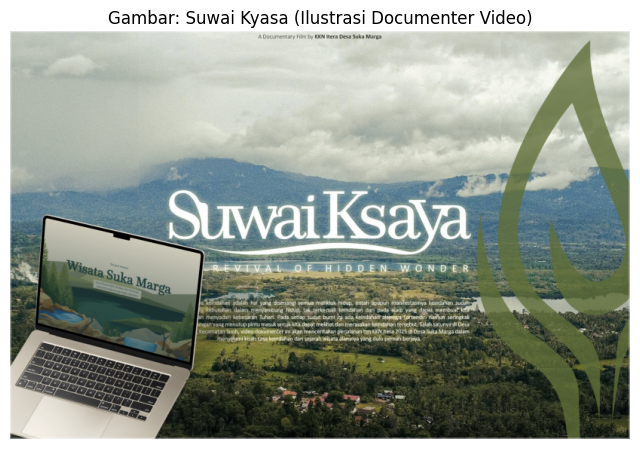

In [9]:
# Path file image
image_path = os.path.join(os.getcwd(), "data", "suwai-kyasa.png")

# Muat dan tampilkan gambar dengan OpenCV + Matplotlib
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Gambar: Suwai Kyasa (Ilustrasi Documenter Video)")
plt.show()

### Analisa

Gambar ini merupakan gambar hasil ilustrasi project documenter tim KKN Suka Marga, dimana object yang paling dominan digambar ini aslinya itu menunjukan alam suka marga yang merupakan hidden wonder, tapi di gambar ini sudah ditambahkan teks, logo, dan mockup website yang dibuat, kondisi pencahayaan nya merata tidak ada yang dominan, komposisi warna yang digunakan dominan warna hijau alam dengan sedikit warna biru untuk danau.

---

### B3. TODO: Informasi Dasar

**Instruksi:**
Tampilkan informasi metadata gambar:
- Dimensi (Height × Width)
- Jumlah kanal
- Tipe data (dtype)
- Mode warna (jika relevan)
- Ukuran file dalam memori

**Analisis yang diperlukan:**
Jelaskan mengapa informasi ini penting untuk tahap preprocessing atau analisis lanjutan.

In [10]:
# Dapatkan informasi dasar gambar
height, width, n_channels = img.shape
dtype = img.dtype
file_size = os.path.getsize(image_path)
mode = "Grayscale" if n_channels == 1 else "RGB" if n_channels == 3 else "RGBA" if n_channels == 4 else f"{n_channels}-channel"

# Tampilkan informasi dasar
print("=== Informasi Dasar Gambar ===")
print(f"Dimensi       : {height} x {width} piksel")
print(f"Jumlah kanal  : {n_channels} ({mode})")
print(f"Tipe data     : {dtype}")
print(f"Mode warna    : {mode}")
print(f"Ukuran file   : {file_size / 1024:.2f} KB")

=== Informasi Dasar Gambar ===
Dimensi       : 541 x 823 piksel
Jumlah kanal  : 3 (RGB)
Tipe data     : uint8
Mode warna    : RGB
Ukuran file   : 730.14 KB


---

### B4. TODO: Histogram Warna

**Instruksi:**
Tampilkan histogram distribusi intensitas untuk channel R, G, B:
- Range: 0-255
- Plot terpisah atau overlay dengan warna sesuai channel
- Label sumbu: intensitas pixel dan frekuensi
- Legend yang jelas

**Analisis yang diperlukan:**
Analisis: channel mana yang dominan? Bagaimana kontras gambar? Seperti apa sebaran intensitasnya?

*(Tambahkan sel kode di sini)*

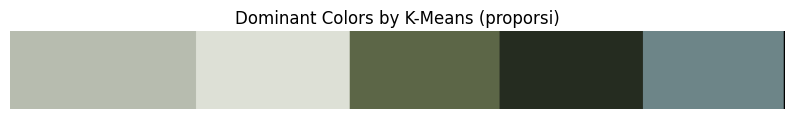

#1: RGB(183, 188, 175) — 24.0%
#2: RGB(221, 224, 214) — 19.8%
#3: RGB(92, 102, 71) — 19.4%
#4: RGB(37, 44, 32) — 18.6%
#5: RGB(109, 133, 136) — 18.1%


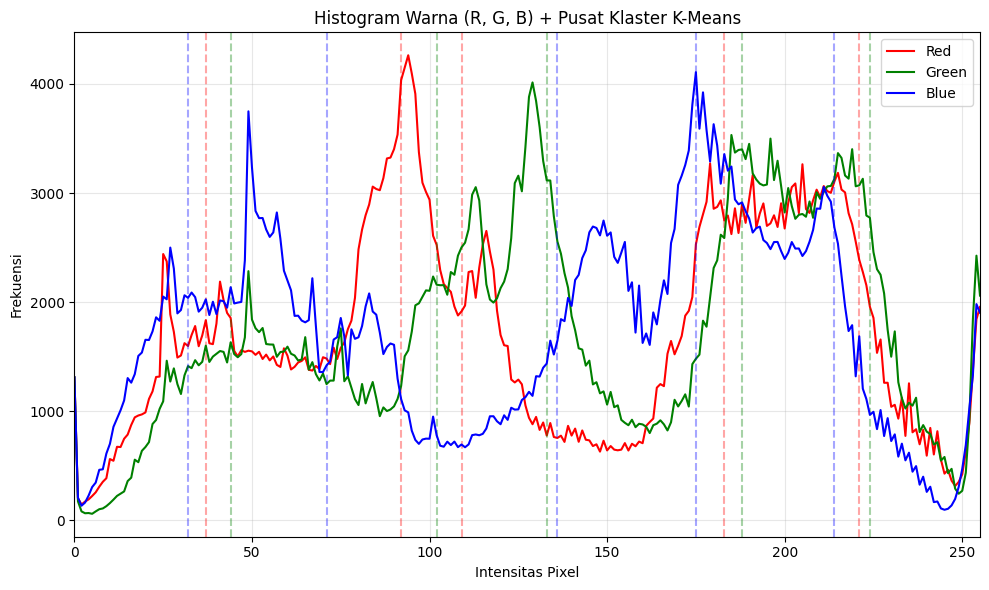

Total frekuensi pixel: 445243


In [11]:
# susun data pixel (N x 3) dalam ruang RGB sebagai float32
pixels = img_rgb.reshape(-1, 3).astype(np.float32)

# sampling opsional agar cepat untuk gambar besar (~100k sampel)
max_samples = 100_000
if pixels.shape[0] > max_samples:
    idx = np.random.choice(pixels.shape[0], max_samples, replace=False)
    data = pixels[idx]
else:
    data = pixels

# jalankan k-means (K warna dominan)
K = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.5)
flags = cv2.KMEANS_PP_CENTERS
compactness, labels, centers = cv2.kmeans(data, K, None, criteria, 5, flags)

# hitung proporsi tiap klaster dan urutkan dari dominan ke kecil
labels = labels.flatten()
counts = np.bincount(labels, minlength=K).astype(np.float32)
props = counts / counts.sum()
order = np.argsort(-props)
centers = centers[order].astype(np.uint8)
props = props[order]

# buat palette proporsi warna sebagai infografis
h, w = 60, 600
palette = np.zeros((h, w, 3), dtype=np.uint8)
x0 = 0
for p, c in zip(props, centers):
    x1 = x0 + int(p * w)
    cv2.rectangle(palette, (x0, 0), (x1, h), color=tuple(int(v) for v in c.tolist()), thickness=-1)
    x0 = x1

# tampilkan palette dan daftar warna (RGB) + persentase
plt.figure(figsize=(10, 2.2))
plt.imshow(palette)
plt.axis('off')
plt.title("Dominant Colors by K-Means (proporsi)")
plt.show()

for i, (c, p) in enumerate(zip(centers, props), 1):
    print(f"#{i}: RGB({c[0]}, {c[1]}, {c[2]}) — {p*100:.1f}%")

# hitung histogram per channel lalu tandai nilai pusat klaster di tiap channel
channels = cv2.split(img_rgb)
colors = ('r', 'g', 'b')
names = ('Red', 'Green', 'Blue')
plt.figure(figsize=(10, 6))
for chan, col, name in zip(channels, colors, names):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=col, label=name)
    # tandai nilai channel dari pusat klaster
    if col == 'r':
        marks = centers[:, 0]
    elif col == 'g':
        marks = centers[:, 1]
    else:
        marks = centers[:, 2]
    for m in marks:
        plt.axvline(x=m, color=col, linestyle='--', alpha=0.35)

plt.xlim([0, 255])
plt.title("Histogram Warna (R, G, B) + Pusat Klaster K-Means")
plt.xlabel("Intensitas Pixel")
plt.ylabel("Frekuensi")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# print total frekuensi pada gambar
print(f"Total frekuensi pixel: {pixels.shape[0]}")

---

### B5. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

**Relasi histogram dengan kesan visual:** Apa hubungan antara pola histogram yang Anda lihat dengan kesan visual gambar (terang/gelap, warna dominan, kontras)?

*Jawaban Anda:*     
Dari gambar histogram yang saya pahami adalah intensitas warna hijau dan biru lebih menyebar dan banyak lekukannya dibanding merah, yang sejalan dengan kesan visual gambar berupa pemandangan alam dengan dominasi pepohonan dan danau. Puncak histogram pada intensitas menengah hingga tinggi menandakan gambar cenderung cerah dengan banyak area terang, misalnya langit dan teks putih. Distribusi yang lebar pada semua kanal juga menunjukkan kontras yang cukup baik, sehingga detail objek tetap terlihat jelas. Dengan kata lain, histogram merefleksikan kesan visual gambar yang dominan hijau kebiruan, terang di beberapa bagian, dan memiliki kontras sedang hingga tinggi.

# Bagian C — Video

### C1. Deskripsi Data

**TODO:** Jelaskan video yang akan Anda analisis:
- Jenis video: Documenter Danau Asam Suoh Lampung Barat
- Sumber: rekaman tim kkn
- Durasi target: 29 Detik
- Alasan pemilihan: Danaunya kalcer

**Path file:** `data/danau-asam.mp4`

---

### C2. TODO: Baca & Metadata

**Instruksi:**
Baca video dengan OpenCV dan tampilkan metadata:
- Resolusi (Width × Height)
- Frame rate (fps)
- Jumlah total frame
- Durasi (detik)
- Klasifikasi resolusi (HD, Full HD, 4K, dll.)

**Analisis yang diperlukan:**
Jelaskan pentingnya parameter-parameter tersebut untuk analisis video atau aplikasi tertentu.

In [12]:
# buka video dan ambil properti dasar
video_path = os.path.join(os.getcwd(), "data", "danau-asam.mp4")

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise RuntimeError(f"Gagal membuka video: {video_path}")

# baca metadata dari VideoCapture
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)
nframe = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# handle fps tak terdeteksi (beberapa codec melaporkan 0)
fps = float(fps) if fps and fps > 0 else 30.0
duration_sec = nframe / fps if fps > 0 else 0.0
aspect = width / height if height else 0

# klasifikasikan resolusi berdasarkan tinggi (umum dipakai di industri)
def classify_resolution(w, h):
    if   h >= 4320 and w >= 7680: return "8K (4320p)"
    elif h >= 2160 and w >= 3840: return "4K (2160p)"
    elif h >= 1440 and w >= 2560: return "2K/QHD (1440p)"
    elif h >= 1080 and w >= 1920: return "Full HD (1080p)"
    elif h >= 720  and w >= 1280: return "HD (720p)"
    elif h >= 480:                 return "SD (480p)"
    else:                           return "Di bawah SD"

res_class = classify_resolution(width, height)

# tampilkan ringkasan metadata
print("=== Metadata Video ===")
print(f"Path           : {video_path}")
print(f"Resolusi       : {width} × {height}  ({res_class})")
print(f"Aspect Ratio   : {aspect:.2f}:1")
print(f"Frame Rate     : {fps:.3f} fps")
print(f"Total Frame    : {nframe}")
print(f"Durasi         : {duration_sec:.2f} detik")

# pastikan resource dilepas
cap.release()


=== Metadata Video ===
Path           : c:\Users\muham\OneDrive\Desktop\sistem-teknologi-multimedia\data\danau-asam.mp4
Resolusi       : 1920 × 1080  (Full HD (1080p))
Aspect Ratio   : 1.78:1
Frame Rate     : 29.970 fps
Total Frame    : 882
Durasi         : 29.43 detik


### Analisis variable metadata video

Menurut saya metadata video merupakan langkah awal untuk memahami berbagai properti video, mulai dari resolusi, aspect ratio, frame rate, total frame, hingga durasi, yang masing-masing memiliki peran penting.

1. Resolusi menentukan kualitas gambar setiap frame, semakin tinggi resolusi, semakin tajam dan jernih gambar yang dihasilkan.      
2. Aspect ratio berfungsi untuk menjaga perbandingan lebar dan tinggi gambar agar tidak terdistorsi saat kualitas pixelnya diubah, sehingga video tetap proporsional.       
3. Frame rate menunjukkan jumlah frame yang ditampilkan per detik, yang berpengaruh pada kelancaran gerakan dalam video, sedangkan total frame memberikan informasi tentang jumlah keseluruhan frame, berguna untuk fitur cut atau editing lainnya.     
4. Durasi menunjukkan lama video tersebut berlangsung, yang penting untuk mengetahui panjangnya waktu tayang. Semua informasi ini sangat penting dalam berbagai proses pengolahan dan pengeditan video.

---

### C3. TODO: Tampilkan 3 Frame (Awal–Tengah–Akhir)

**Instruksi:**
Ambil dan tampilkan 3 frame representatif:
- Frame pertama (index 0)
- Frame tengah (index ~total_frame/2)
- Frame terakhir (index total_frame-1)
- **Konversi BGR→RGB** sebelum ditampilkan
- Subplot dengan judul frame dan timestamp

**Analisis yang diperlukan:**
Deskripsikan perbedaan visual antar frame dan apa yang dapat dipelajari dari sampel frame ini.

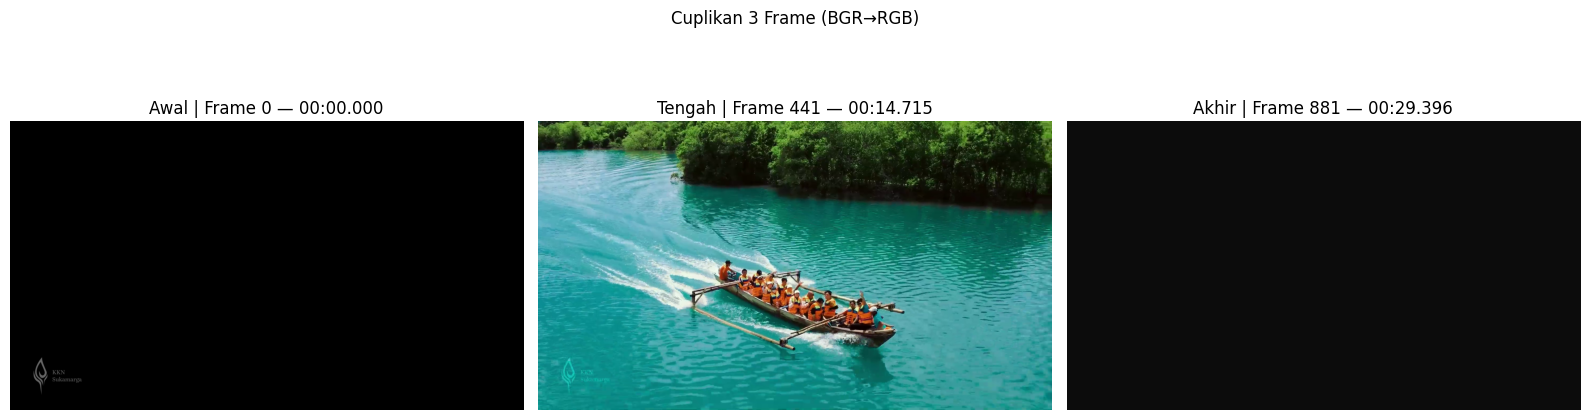

In [13]:
# buka video, ambil fps & total frame, tentukan index awal-tengah-akhir
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise RuntimeError(f"Gagal membuka video: {video_path}")

# pakai fps/total_frames yang sudah ada; jika belum, baca dari cap
try:
    fps = float(fps) if fps and fps > 0 else float(cap.get(cv2.CAP_PROP_FPS))
except NameError:
    fps = float(cap.get(cv2.CAP_PROP_FPS))
fps = fps if fps and fps > 0 else 30.0

try:
    total_frames = int(nframe) if nframe and nframe > 0 else int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
except NameError:
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

idxs = [0, max(0, total_frames // 2), max(0, total_frames - 1)]

# fungsi ringkas: baca frame pada index & konversi BGR→RGB + label timestamp
def read_frame_rgb_at(capture, idx, fps_val):
    capture.set(cv2.CAP_PROP_POS_FRAMES, idx)
    ok, frame_bgr = capture.read()
    if not ok:
        return None, f"Frame {idx} — N/A"
    frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    t = idx / fps_val
    mm, ss = int(t // 60), int(t % 60)
    ms = int(round((t - int(t)) * 1000))
    return frame_rgb, f"Frame {idx} — {mm:02d}:{ss:02d}.{ms:03d}"

# baca tiga frame target
frames_and_labels = [read_frame_rgb_at(cap, i, fps) for i in idxs]
cap.release()

# subplot 3 kolom: awal, tengah, akhir
plt.figure(figsize=(16, 5))
titles = ["Awal", "Tengah", "Akhir"]
for i, (res, ttl) in enumerate(zip(frames_and_labels, titles), 1):
    img, stamp = res
    plt.subplot(1, 3, i)
    if img is None:
        plt.text(0.5, 0.5, "Frame tidak terbaca", ha='center', va='center'); plt.axis('off')
    else:
        plt.imshow(img); plt.axis('off'); plt.title(f"{ttl} | {stamp}")
plt.suptitle("Cuplikan 3 Frame (BGR→RGB)")
plt.tight_layout()
plt.show()


### Analisis frame

Frame awal hitam yang menunjukan transisi fade-in pada video dokumenter danau asam lengkap dengan watermark, ditengah frame menunjukan video mahasiswa kkn yang sedang menaiki kapal, diambil dengan drone di tengah danau asam, lalu di akhir frame juga hitam yang kemungkinan transisi fade-out video.

---

### C4. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

**Kesesuaian parameter:** Apakah fps dan resolusi video ini sesuai untuk use case pilihan Anda (misalnya: media sosial, kuliah daring, presentasi, dll.)? Jelaskan alasan singkat.

*Jawaban Anda:*     
Menurut analisis yang saya pahami dari metadata video, pilihan yang digunakan sangat amat tepat, karena yang membuat ini anak DKV yang sudah sangat paham dengan video editing, lalu dari fps 30 yang cocok untuk video yang ditujukan untuk dokumenter (supaya penontonnya lebih menghayati), untuk resolusi juga sudah pas, tidak terlalu besar dan standar HD youtube yakni 1080 p (progressive), menyesuaikan ke layar target audience dan platform yang kami gunakan untuk upload video.

# Perbandingan & Kesimpulan

## Perbandingan Representasi Media

### Audio (1D - Temporal)
- Representasi: Audio yang memiliki beat konstan, instrumen dan ketukan yang slow
- Visualisasi utama: waveform, spectrogram log-dB, dan MFCC (Mel-Frequency Cepstral Coefficients)
- Informasi yang diperoleh:     
1. Gambar dari waveform yang mirip dari stereo kedua kanal(kanan dan kiri) walau amplitudo audio agak condong ke kanal kiri
2. Gambar dari spectogram yang konsisten, warna kuning sepertinya menunjukan beat lagu ..dung..dung..dung, biru cerah frekuensi tinggi itu nyanyain lagunya, biru tua itu minim suara kemungkinan transisi audio dan fadeout audio,
3. MFCC yang stabil di kedua kanal, 
4. Metadata/informasi detail audio

### Gambar (2D - Spasial)  
- Representasi: Matriks 2 dimensi warna rgb pixel tertentu pada koordinat (x, y)
- Visualisasi utama: Tampilan gambar dalam format RGB dan histogram distribusi warna
- Informasi yang diperoleh: kontras gambar, warna dominan, Metadata/informasi detail gambar, korelasi antara histogram (frekuensi dan intensitas pixelnya) dan visual gambar yang di load

### Video (2D + Waktu - Spatio-temporal)
- Representasi: Urutan frame gambar 2D yang berubah terhadap waktu dengan frame rate tertentu.
- Visualisasi utama: Metadata (resolusi, fps, durasi) dan cuplikan beberapa frame (awal–tengah–akhir).
- Informasi yang diperoleh: Dinamika temporal (perubahan adegan, gerakan objek, transisi), kesesuaian resolusi/fps dengan kebutuhan aplikasi, serta kontinuitas visual dari awal sampai akhir.

---

## Refleksi Pembelajaran

### 3 Poin yang Saya Pelajari:
1. Cara mengelola audio, image, dan video
2. Waveform, Spectogram, MFCC, cara membaca histogram data, cara membuat markdown rapih
3. Belajar menganalisis todo, kemudian how to solve, analisis visual dan merelasikan ke konteks pembelajaran

### 2 Hal yang Masih Membingungkan/Ingin Diperdalam:
1. Teknis lebih detail dari masing masing pemrosesan supaya bisa di convert ke tools yang solve realcase problem
2. MFCC secara detail

---

## Sumber Data & Referensi

**TODO:** Cantumkan semua sumber data dan referensi yang digunakan:

- **Audio:** https://music.youtube.com/watch?v=p1WdGmMiWCc&si=IyK4sQTtIMuT_iT6
- **Gambar:** Sumber Pribadi
- **Video:** Sumber Tim KKN https://youtu.be/Fxwxw752QvY?si=Y53iHHtwzPw09dv9
- **Referensi teknis:**     
https://github.com/informatika-itera/IF25-40305-handson     
https://towardsdev.com/how-to-plot-color-channels-histogram-of-an-image-in-python-using-opencv-40022032e127
https://chatgpt.com/share/e/68c2279a-09f0-8006-84d5-0bd42ad0baa8
https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html

